<a href="https://colab.research.google.com/github/sinku247/MSML/blob/main/ML_keras_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))

  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  
  return results

In [6]:
# 훈련데이터와 테스트 데이터의 벡터 변환 
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 라벨 데이터를 카테고리 데이터로 전환 
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
# 모델 구성
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 72ms/step - loss: 2.8055 - accuracy: 0.4761 - val_loss: 1.8781 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.5990 - accuracy: 0.6731 - val_loss: 1.4078 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 1s 48ms/step - loss: 1.2297 - accuracy: 0.7344 - val_loss: 1.2167 - val_accuracy: 0.7280
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0033 - accuracy: 0.7844 - val_loss: 1.1155 - val_accuracy: 0.7530
Epoch 5/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8368 - accuracy: 0.8167 - val_loss: 1.0302 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6941 - accuracy: 0.8483 - val_loss: 0.9946 - val_accuracy: 0.7790
Epoch 7/20
16/16 [==============================] - 1s 47ms/step - loss: 0.5777 - accuracy: 0.8756 - val_loss: 0.9231 - val_accuracy: 0.8070
Epoch 8/20
16

In [12]:
import matplotlib.pyplot as plt

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

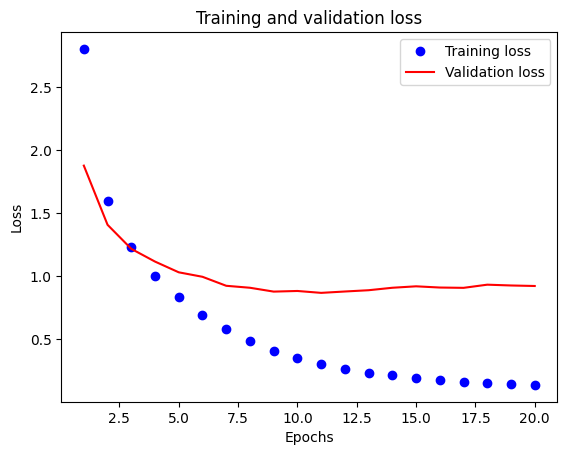

In [15]:
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss, 'bo',label='Training loss')
plt.plot(epochs,val_loss,'r-',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

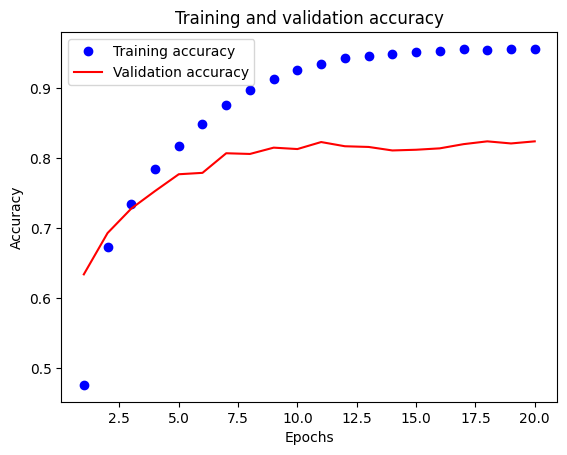

In [16]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [17]:
# 검증 된 결과로 다시 학습 

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

eval_result = model.evaluate(x_test, one_hot_test_labels)
print(eval_result)

Epoch 1/10
16/16 [==============================] - 2s 98ms/step - loss: 2.6854 - accuracy: 0.5054 - val_loss: 1.8007 - val_accuracy: 0.6200
Epoch 2/10
16/16 [==============================] - 1s 88ms/step - loss: 1.5195 - accuracy: 0.6761 - val_loss: 1.3862 - val_accuracy: 0.6930
Epoch 3/10
16/16 [==============================] - 1s 63ms/step - loss: 1.1696 - accuracy: 0.7398 - val_loss: 1.1949 - val_accuracy: 0.7290
Epoch 4/10
16/16 [==============================] - 1s 49ms/step - loss: 0.9680 - accuracy: 0.7883 - val_loss: 1.0901 - val_accuracy: 0.7600
Epoch 5/10
16/16 [==============================] - 1s 46ms/step - loss: 0.8060 - accuracy: 0.8276 - val_loss: 1.0040 - val_accuracy: 0.7910
Epoch 6/10
16/16 [==============================] - 1s 48ms/step - loss: 0.6786 - accuracy: 0.8564 - val_loss: 0.9483 - val_accuracy: 0.8000
Epoch 7/10
16/16 [==============================] - 1s 45ms/step - loss: 0.5680 - accuracy: 0.8796 - val_loss: 0.9182 - val_accuracy: 0.7990
Epoch 8/10
16